In [1]:
# Trendings based on the most recent 100 tweets:
# 1. CNN news has the least bias;
# 2. BBC news have the most negative average sentiment scores;
# 3. Most of the news should be staying unbiased where sentiment scores equals 0

In [2]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from config import ConsumerKey, ConsumerSecret, AccessToken, AccessTokenSecret
# Twitter API Keys
consumer_key = ConsumerKey
consumer_secret = ConsumerSecret
access_token = AccessToken
access_token_secret = AccessTokenSecret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
target_users = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYT']
# Create a Dataframe for 5 news organizations
five_news_df = pd.DataFrame({"BBCNews":'',"CBSNews":'',"CNN":'',"FoxNews":'',"NYT":''}, index=[0])

In [5]:
# loop through 5 new organizations
for user in target_users:
    i = 0 # row index for in five_news_df
    tweet_status = tweepy.Cursor(api.user_timeline, id=user)
    for status in tweet_status.items(100):
        # extract text and run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(status.text)["compound"]
        
        # Add compound value to the dataframe
        five_news_df.set_value(i, user[1:], compound)
        i += 1 # next row

five_news_df.head(10)

,BBCNews,CBSNews,CNN,FoxNews,NYT
0,-0.4215,0,-0.3182,-0.1531,0
1,-0.4019,0,0.6249,0.2924,0.5267
2,-0.34,-0.6597,-0.3182,-0.4404,0.1027
3,0,0,0,-0.0258,0
4,-0.3182,0.0772,-0.4404,0.0258,0
5,0,0.7506,0.2023,-0.34,-0.6597
6,0,-0.7003,0.1828,0,0
7,-0.4767,0,0,0,0
8,0,-0.5994,-0.7096,0,0
9,-0.34,-0.5574,-0.34,-0.296,-0.6249


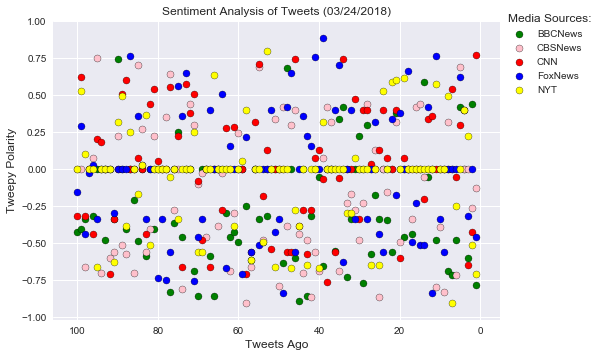

In [6]:
x_axis = np.arange(100,0,-1)
mpl.style.use('seaborn')
plt.grid(color = "white")
bbc = plt.scatter(x_axis, five_news_df['BBCNews'], facecolor = "green", edgecolors = "black")
cbs = plt.scatter(x_axis, five_news_df['CBSNews'], facecolor = "pink", edgecolors = "black")
cnn = plt.scatter(x_axis, five_news_df['CNN'],facecolor = "red", edgecolors = "black")
fox = plt.scatter(x_axis, five_news_df['FoxNews'], facecolor = "blue", edgecolors = "black")
nyt = plt.scatter(x_axis, five_news_df['NYT'], facecolor = "yellow", edgecolors = "black")
# set appropiate labels
plt.title('Sentiment Analysis of Tweets (03/24/2018)',fontsize=12)
plt.xlabel("Tweets Ago",fontsize=12)
plt.ylabel('Tweepy Polarity',fontsize=12)
plt.gca().invert_xaxis() 
# Add legends and texts
plt.legend((bbc,cbs,cnn,fox,nyt),numpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.text(-7,1,"Media Sources:",fontsize=12)
lgd = plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('Sentiment_scatter_plot.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

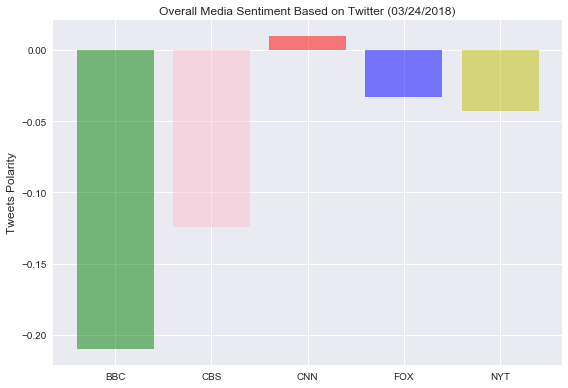

In [7]:
# Average score for each news organization
bbc_avg = five_news_df['BBCNews'].mean()
cbs_avg = five_news_df['CBSNews'].mean()
cnn_avg = five_news_df['CNN'].mean()
fox_avg = five_news_df['FoxNews'].mean()
nyt_avg = five_news_df['NYT'].mean()
# set different color for each new organization
colors = ["g","pink",'r',"b","y"]
plt.bar(np.arange(5),[bbc_avg,cbs_avg,cnn_avg,fox_avg,nyt_avg], color = colors, alpha=0.5, align="edge")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in np.arange(5)]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
# Add labels
plt.title('Overall Media Sentiment Based on Twitter (03/24/2018)',fontsize = 12)
plt.ylabel('Tweets Polarity',fontsize = 12)
# save image
plt.savefig('Sentiment_Avg.png',fontsize = 12)
plt.tight_layout()
plt.show()